# Weather Dataset

The python script below was used to visualize the weather of 500+ cities across the world. The script generates a random combination of latitudes and longitudes to ensure that the cities are not repeated. Using the coordinates, a list of cities was pulled on 12/01/2020 from OpenWeatherMap API using a series of successive API calls. The list of cities was saved into a csv file as cities.csv. Lastly, 4 scatterplots were created to visualize the effect the distance from the equator has on the max temperature (F), humidity %, cloudiness %, and wind speed (mph) of these cities. 

In [3]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API Key
from api_keys import weather_api_key

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding coordinates (latitude and longitud) and cities
coordinates = []
cities = []

# Create a set of random lat and long combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lat, long)

# Identify nearest city for each lat, long combination
for lat_longs in coordinates:
    city = citipy.nearest_city(lat_longs[0], lat_longs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Perform API Calls

In [5]:
#Lists and counters
new_cities = []
cloud = []
country = []
date = []
humidity = []
temp = []
lats = []
longs = []
wind = []
index_counter = 0
set_counter = 1

In [6]:
# Weather API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="
response = requests.get(url + city).json()
response

{'coord': {'lon': -79.24, 'lat': 42.1},
 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 29.43,
  'feels_like': 19.44,
  'temp_min': 28.4,
  'temp_max': 30,
  'pressure': 1001,
  'humidity': 92},
 'visibility': 4828,
 'wind': {'speed': 10.29, 'deg': 270},
 'snow': {'1h': 0.87},
 'clouds': {'all': 90},
 'dt': 1606865099,
 'sys': {'type': 1,
  'id': 4588,
  'country': 'US',
  'sunrise': 1606825588,
  'sunset': 1606859181},
 'timezone': -18000,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

In [7]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# For loop matching city names with cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        new_cities.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : praia
Processing Record 2 of Set 1 : celestun
Processing Record 3 of Set 1 : marienburg
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : mersing
Processing Record 6 of Set 1 : east london
Processing Record 7 of Set 1 : tucurui
Processing Record 8 of Set 1 : vaini
Processing Record 9 of Set 1 : puerto ayora
Processing Record 10 of Set 1 : coruripe
Processing Record 11 of Set 1 : hermanus
Processing Record 12 of Set 1 : simi
City not found. Skipping...
Processing Record 13 of Set 1 : ucluelet
Processing Record 14 of Set 1 : namibe
Processing Record 15 of Set 1 : georgetown
Processing Record 16 of Set 1 : los algarrobos
Processing Record 17 of Set 1 : ulladulla
Processing Record 18 of Set 1 : olonets
Processing Record 19 of Set 1 : castro
Processing Record 20 of Set 1 : qaanaaq
Processing Record 21 of Set 1 : vostok
Processing Record 22 of Set 1 : tual
Processing Record 23 of Set 

Processing Record 40 of Set 4 : san andres
City not found. Skipping...
Processing Record 41 of Set 4 : ayan
Processing Record 42 of Set 4 : yenagoa
City not found. Skipping...
Processing Record 43 of Set 4 : rio grande
Processing Record 44 of Set 4 : joao neiva
Processing Record 45 of Set 4 : qasigiannguit
Processing Record 46 of Set 4 : agropoli
Processing Record 47 of Set 4 : martapura
Processing Record 48 of Set 4 : puerto berrio
Processing Record 49 of Set 4 : smithers
City not found. Skipping...
Processing Record 50 of Set 4 : nara
Processing Record 0 of Set 5 : strezhevoy
Processing Record 1 of Set 5 : ios
Processing Record 2 of Set 5 : mount isa
Processing Record 3 of Set 5 : klaksvik
Processing Record 4 of Set 5 : bambous virieux
Processing Record 5 of Set 5 : tagusao
Processing Record 6 of Set 5 : kenitra
Processing Record 7 of Set 5 : labuhan
Processing Record 8 of Set 5 : fuyu
Processing Record 9 of Set 5 : thetford mines
Processing Record 10 of Set 5 : lubango
Processing Re

Processing Record 24 of Set 8 : chapadinha
Processing Record 25 of Set 8 : eyl
Processing Record 26 of Set 8 : briancon
Processing Record 27 of Set 8 : atasu
Processing Record 28 of Set 8 : niono
Processing Record 29 of Set 8 : kitimat
Processing Record 30 of Set 8 : magadan
Processing Record 31 of Set 8 : beringovskiy
City not found. Skipping...
Processing Record 32 of Set 8 : arlit
Processing Record 33 of Set 8 : katobu
Processing Record 34 of Set 8 : guerrero negro
Processing Record 35 of Set 8 : wagar
Processing Record 36 of Set 8 : boa vista
City not found. Skipping...
Processing Record 37 of Set 8 : sabzevar
Processing Record 38 of Set 8 : namatanai
City not found. Skipping...
Processing Record 39 of Set 8 : thinadhoo
Processing Record 40 of Set 8 : hue
Processing Record 41 of Set 8 : sulangan
Processing Record 42 of Set 8 : wamba
Processing Record 43 of Set 8 : usinsk
Processing Record 44 of Set 8 : lovozero
Processing Record 45 of Set 8 : zyryanka
Processing Record 46 of Set 8 

Processing Record 10 of Set 12 : samoded
Processing Record 11 of Set 12 : muyezerskiy
Processing Record 12 of Set 12 : niamey
Processing Record 13 of Set 12 : tanete
Processing Record 14 of Set 12 : kamina
Processing Record 15 of Set 12 : sun city west
Processing Record 16 of Set 12 : houma
Processing Record 17 of Set 12 : khamgaon
Processing Record 18 of Set 12 : kathmandu
Processing Record 19 of Set 12 : aracataca
Processing Record 20 of Set 12 : matara
Processing Record 21 of Set 12 : filingue
City not found. Skipping...
Processing Record 22 of Set 12 : leningradskiy
Processing Record 23 of Set 12 : bonfim
-------------------------------
Data Retrieval Complete
-------------------------------


In [70]:
#Create a dataframe using information from data retrieval
weather_dict = ({"City" : new_cities, 
                 "Latitude" : lats, 
                 "Longitude" : longs, 
                 "Max Temperature (F)" : temp,                            
                 "Humidity %" : humidity, 
                 "Cloudiness %" : cloud, 
                 "Wind Speed (mph)" : wind, 
                 "Country" : country, 
                 "Date" : date
                 })

weather_data = pd.DataFrame(weather_dict)

In [71]:
# Inspect the data for outliers (cities with humidity over 100%)
weather_data.loc[weather_data['Humidity %'] > 100]

,City,Latitude,Longitude,Max Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date


In [72]:
#Save weather data to a csv file
weather_data.to_csv("cities.csv", index=False)

## Plotting the Data

### Scatter Plots

In [87]:
# Define a function for scatter plots

coord = weather_data.loc[pd.to_numeric(weather_data["Latitude"]).astype(float) >= -90.0, :]

def scatter(x_axis, y_axis, x_label, y_label, title, ifig):
    plt.figure(figsize=(10,8))
    plt.scatter(x_axis, y_axis, marker='o', c='r', edgecolor='b', s = 124, alpha=0.7)
    plt.xlabel(x_label, size=12)
    plt.ylabel(y_label, size=12)
    plt.grid(linestyle='-', linewidth=2, alpha=0.5)
    plt.grid(True)
    plt.title(title, size=16)
    plt.savefig(f"assets/images/fig{ifig}.png")
    plt.show()

#### Latitude vs. Temperature Plot

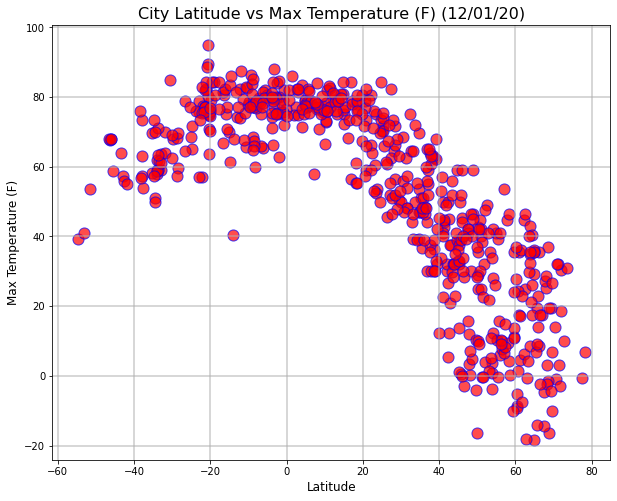

In [88]:
# Define variables and create plot using scatter function
x_label = "Latitude"
y_label = "Max Temperature (F)"
title = (f"City Latitude vs Max Temperature (F) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 1)

#### Latitude vs. Humidity Plot

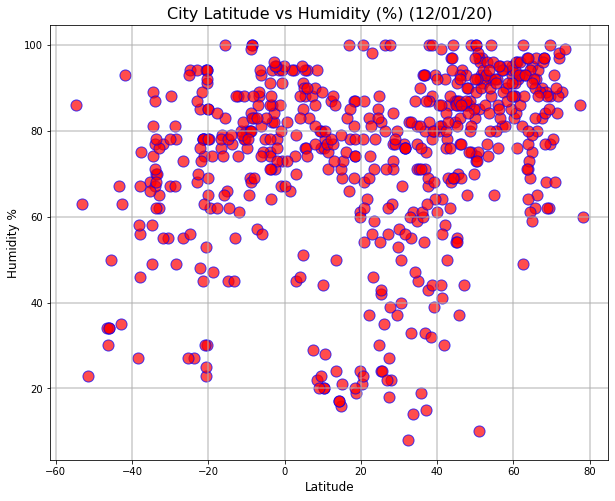

In [89]:
# Define variables and create plot using scatter function
x_label = "Latitude"
y_label = "Humidity %"
title = (f"City Latitude vs Humidity (%) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 2)

#### Latitude vs. Cloudiness Plot

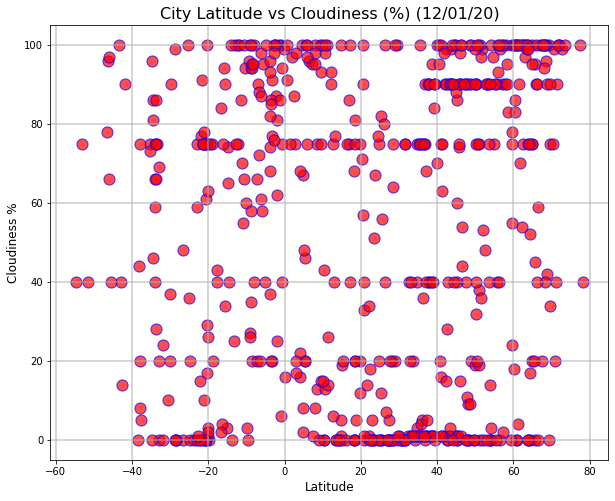

In [90]:
# Define variables and create plot using scatter function
x_label = "Latitude"
y_label = "Cloudiness %"
title = (f"City Latitude vs Cloudiness (%) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 3)

#### Latitude vs. Wind Speed Plot

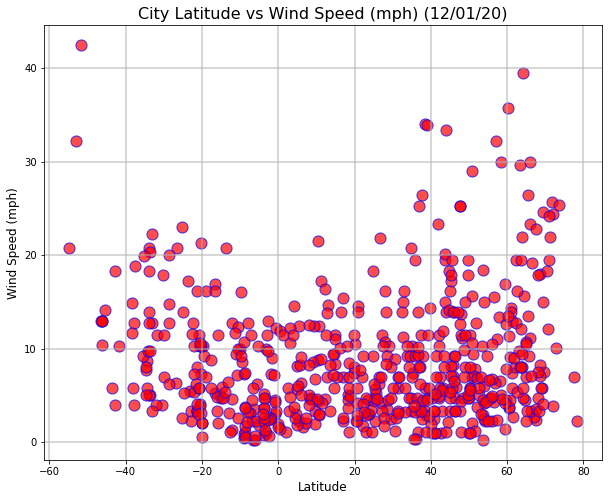

In [91]:
# Define variables and create plot using scatter function
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = (f"City Latitude vs Wind Speed (mph) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 4)